In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("digits.csv")
df.head()

,0,0.1,5,13,9,1,0.2,0.3,0.4,0.5,...,0.23,0.24,0.25,6,13.2,10.2,0.26,0.27,0.28,0.29
0,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
1,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
2,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
3,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
4,0,0,12,10,0,0,0,0,0,0,...,0,0,0,9,16,16,10,0,0,5


In [5]:
df_binary = df[df.iloc[:, 0].isin([0, 1])]
X = df_binary.iloc[:, 1:].values / 16.0 
y = df_binary.iloc[:, 0].values.reshape(-1, 1)

input_size = X.shape[1]
hidden_size = 16
output_size = 1

In [7]:
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.1
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.1
b2 = np.zeros((1, output_size))

In [9]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

In [11]:
def binary_cross_entropy(y_true, y_pred):
    eps = 1e-8
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))


In [13]:
learning_rate = 0.1
losses = []

for epoch in range(50):
    z1 = X.dot(W1) + b1
    a1 = relu(z1)

    z2 = a1.dot(W2) + b2
    y_pred = sigmoid(z2)

    loss = binary_cross_entropy(y, y_pred)
    losses.append(loss)

    dloss_dypred = -(y / (y_pred + 1e-8)) + (1 - y) / (1 - y_pred + 1e-8)
    dypred_dz2 = sigmoid_derivative(z2)
    dz2 = dloss_dypred * dypred_dz2

    dW2 = a1.T.dot(dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = dz2.dot(W2.T)
    dz1 = da1 * relu_derivative(z1)

    dW1 = X.T.dot(dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.7028


C:\Users\lenovo\AppData\Local\Temp\ipykernel_21128\1287773807.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 10, Loss: -0.0000
Epoch 20, Loss: -0.0000
Epoch 30, Loss: -0.0000
Epoch 40, Loss: -0.0000


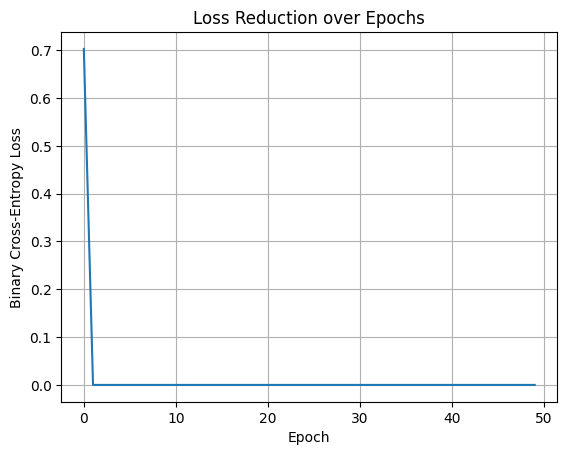

In [15]:
plt.plot(range(50), losses)
plt.title("Loss Reduction over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.show()

In [21]:
print("\n # One challenge with manual backpropagation:")
print("Carefully applying the chain rule across layers and activation functions can lead to bugs if dimensions or derivatives are not handled precisely. It's easy to get gradients wrong without automatic differentiation!")


 # One challenge with manual backpropagation:
Carefully applying the chain rule across layers and activation functions can lead to bugs if dimensions or derivatives are not handled precisely. It's easy to get gradients wrong without automatic differentiation!
